In [1]:
from textblob import TextBlob
import nltk
import tweepy
from textblob import TextBlob
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')


auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\shpkc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\shpkc\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [3]:
public_tweets = api.search('MLB', len='en', count=100)

positive_polarity_count=0
negative_polarity_count=0
netural_polarity_count=0
subjectivity_count=0


for tweet in public_tweets:
    analysis = TextBlob(tweet.text)
    
    if analysis.sentiment.polarity < 0:
        negative_polarity_count += 1
    elif analysis.sentiment.polarity:
        netural_polarity_count += 1
    else:
        positive_polarity_count += 1
    subjectivity_count += 1
    
    print(analysis.sentiment)
    print('-'*70)
print("Average of Twitt in 'MLB' negatve is :", negative_polarity_count, "%")
print("Average of Twitt in 'MLB' positive is :", positive_polarity_count, "%")
print("Average of Twitt in 'MLB' netural is :", netural_polarity_count, "%")
print("Average of Twitt in 'MLB' subjectivity is :",subjectivity_count, "%")

Sentiment(polarity=0.4, subjectivity=0.25)
----------------------------------------------------------------------
Sentiment(polarity=0.5, subjectivity=0.5)
----------------------------------------------------------------------
Sentiment(polarity=0.13333333333333333, subjectivity=0.4666666666666666)
----------------------------------------------------------------------
Sentiment(polarity=0.0, subjectivity=0.0)
----------------------------------------------------------------------
Sentiment(polarity=-0.07142857142857142, subjectivity=0.14285714285714285)
----------------------------------------------------------------------
Sentiment(polarity=0.8, subjectivity=0.55)
----------------------------------------------------------------------
Sentiment(polarity=0.25, subjectivity=0.25)
----------------------------------------------------------------------
Sentiment(polarity=0.375, subjectivity=0.2)
----------------------------------------------------------------------
Sentiment(polarity=0.0, su

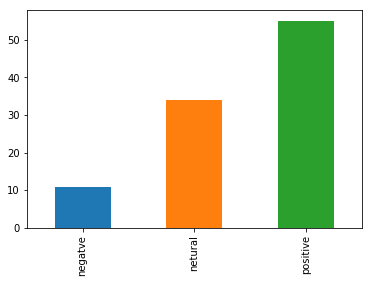

In [4]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

df = pd.DataFrame([{'negatve' : negative_polarity_count,
                   'positive' : positive_polarity_count,
                   'netural' : netural_polarity_count,}])

df.mean().plot(kind='bar')

In [15]:
'TWITTER_ACCESS_TOKEN' in os.environ

False